In [1]:
import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Jyotsna Khatter\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Jyotsna Khatter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).typ

In [33]:
#Creating a dataframe of the imported data from Kaggle.
df = pd.read_csv('../data/commodity_trade_statistics_data.csv')
df = df.dropna()
#Removing zero values from dataframe
df = df[~(df == 0).any(axis=1)]

C:\Users\Jyotsna Khatter\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df)

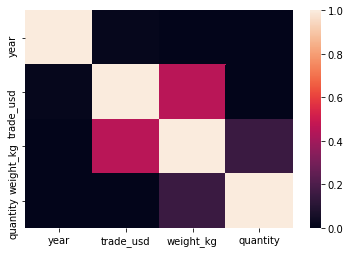

In [35]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [61]:

x=df[['trade_usd','weight_kg','quantity']]

y=df[['country_or_area']]

In [63]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler().fit_transform(x)

In [64]:
z

array([[-0.03339325, -0.01483746, -0.00049957],
       [-0.03339655, -0.01483799, -0.00049957],
       [-0.03181092, -0.01483826, -0.00049956],
       ...,
       [-0.03197123, -0.01480682, -0.00049935],
       [-0.03187014, -0.01471928, -0.00049875],
       [-0.01946705, -0.01418124, -0.00049506]])

In [65]:
pd.DataFrame(z)

,0,1,2
0,-0.033393,-0.014837,-0.000500
1,-0.033397,-0.014838,-0.000500
2,-0.031811,-0.014838,-0.000500
3,-0.029660,-0.014405,-0.000500
4,-0.011287,-0.011151,-0.000499
5,-0.029261,-0.014739,-0.000485
6,-0.033267,-0.014836,-0.000499
7,-0.033362,-0.014837,-0.000499
8,-0.029649,-0.014089,-0.000497
9,-0.033013,-0.014756,-0.000499


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [67]:
principalComponents = pca.fit_transform(x)

In [68]:
principalComponents

array([[-1.87410687e+08],
       [-1.87410687e+08],
       [-1.87406966e+08],
       ...,
       [-1.87329500e+08],
       [-1.87104090e+08],
       [-1.85718700e+08]])

In [69]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf

,principal component 1
0,-1.874107e+08
1,-1.874107e+08
2,-1.874070e+08
3,-1.874027e+08
4,-1.873047e+08
5,-1.817813e+08
6,-1.872956e+08
7,-1.873467e+08
8,-1.864017e+08
9,-1.872054e+08


In [70]:
finalDf = pd.concat([ df[['country_or_area']],principalDf], axis = 1)
finalDf = finalDf.dropna()

In [71]:
num_teams=len(finalDf.country_or_area)
g1 = finalDf.groupby('country_or_area')

In [72]:
# Does this work?
att_starting_points = np.log(g1['principal component 1'].fillna(0).mean())
att_starting_points

16.245805373788716

In [73]:
g1['principal component 1'].mean()

country_or_area
Afghanistan                        -1.711517e+08
Albania                            -1.815883e+08
Algeria                            -1.787836e+08
Andorra                            -1.727270e+08
Angola                             -1.793260e+08
Anguilla                           -1.818045e+08
Antigua and Barbuda                -1.611117e+08
Argentina                          -1.389882e+08
Armenia                            -1.449705e+08
Aruba                              -1.589992e+08
Australia                          -1.582287e+08
Austria                            -1.684725e+08
Azerbaijan                         -1.561871e+08
Bahamas                            -1.630304e+08
Bahrain                            -1.770101e+08
Bangladesh                         -1.428664e+08
Barbados                           -1.167947e+08
Belarus                            -1.435265e+08
Belgium                            -1.632927e+08
Belgium-Luxembourg                 -1.738741e+08
Beli

In [74]:
np.log(g1['principal component 1'].mean())

country_or_area
Afghanistan                               NaN
Albania                                   NaN
Algeria                                   NaN
Andorra                                   NaN
Angola                                    NaN
Anguilla                                  NaN
Antigua and Barbuda                       NaN
Argentina                                 NaN
Armenia                                   NaN
Aruba                                     NaN
Australia                                 NaN
Austria                                   NaN
Azerbaijan                                NaN
Bahamas                                   NaN
Bahrain                                   NaN
Bangladesh                                NaN
Barbados                                  NaN
Belarus                                   NaN
Belgium                                   NaN
Belgium-Luxembourg                        NaN
Belize                                    NaN
Benin             

In [75]:
att_starting_points = np.log(g1['principal component 1'].mean()).fillna(0)
att_starting_points

country_or_area
Afghanistan                          0.000000
Albania                              0.000000
Algeria                              0.000000
Andorra                              0.000000
Angola                               0.000000
Anguilla                             0.000000
Antigua and Barbuda                  0.000000
Argentina                            0.000000
Armenia                              0.000000
Aruba                                0.000000
Australia                            0.000000
Austria                              0.000000
Azerbaijan                           0.000000
Bahamas                              0.000000
Bahrain                              0.000000
Bangladesh                           0.000000
Barbados                             0.000000
Belarus                              0.000000
Belgium                              0.000000
Belgium-Luxembourg                   0.000000
Belize                               0.000000
Benin             

In [91]:
att_starting_points.describe()

count    206.000000
mean       0.949132
std        4.254129
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       26.240613
Name: principal component 1, dtype: float64

In [95]:
type(att_starting_points)

pandas.core.series.Series

In [96]:
att_starting_points.nonzero()

(array([101, 131, 146, 147, 153, 172, 173, 174, 195, 196], dtype=int64),)

In [100]:
att_starting_points = att_starting_points.iloc[att_starting_points.nonzero()[0]]

In [101]:
att_starting_points

country_or_area
Kiribati                26.240613
Netherlands             15.396817
Philippines             19.615152
Poland                  18.299685
Russian Federation      21.581250
South Africa            19.024829
Spain                   19.551403
Sri Lanka               19.489521
United Arab Emirates    18.825864
United Kingdom          17.496154
Name: principal component 1, dtype: float64

# Fixing the model
Let's rewind a few cells. First, re-run the x cell (cell #10) some dozen cells above.

In [76]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler().fit_transform(x)

In [77]:
pd.DataFrame(z)

,0,1,2
0,-0.033393,-0.014837,-0.000500
1,-0.033397,-0.014838,-0.000500
2,-0.031811,-0.014838,-0.000500
3,-0.029660,-0.014405,-0.000500
4,-0.011287,-0.011151,-0.000499
5,-0.029261,-0.014739,-0.000485
6,-0.033267,-0.014836,-0.000499
7,-0.033362,-0.014837,-0.000499
8,-0.029649,-0.014089,-0.000497
9,-0.033013,-0.014756,-0.000499


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [81]:
principalComponents = pca.fit_transform(x)

In [82]:
pd.DataFrame(principalComponents)

,0,1,2
0,-1.874107e+08,-4.030394e+07,-1.676790e+07
1,-1.874107e+08,-4.030554e+07,-1.676985e+07
2,-1.874070e+08,-4.018200e+07,-1.575449e+07
3,-1.874027e+08,-3.890791e+07,-1.451235e+07
4,-1.873047e+08,-2.915932e+07,-3.765648e+06
5,-1.817813e+08,-3.973549e+07,-1.415197e+07
6,-1.872956e+08,-4.029120e+07,-1.668736e+07
7,-1.873467e+08,-4.030096e+07,-1.674772e+07
8,-1.864017e+08,-3.810129e+07,-1.460404e+07
9,-1.872054e+08,-4.006707e+07,-1.654983e+07


In [83]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-1.874107e+08,-4.030394e+07,-1.676790e+07
1,-1.874107e+08,-4.030554e+07,-1.676985e+07
2,-1.874070e+08,-4.018200e+07,-1.575449e+07
3,-1.874027e+08,-3.890791e+07,-1.451235e+07
4,-1.873047e+08,-2.915932e+07,-3.765648e+06
5,-1.817813e+08,-3.973549e+07,-1.415197e+07
6,-1.872956e+08,-4.029120e+07,-1.668736e+07
7,-1.873467e+08,-4.030096e+07,-1.674772e+07
8,-1.864017e+08,-3.810129e+07,-1.460404e+07
9,-1.872054e+08,-4.006707e+07,-1.654983e+07


In [85]:
finalDf = pd.concat([ df[['country_or_area']],principalDf], axis = 1)
finalDf = finalDf.dropna()

In [86]:
num_countries=len(finalDf.country_or_area)
num_countries

7010344